# Data Analytics III
1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall 
on the given dataset.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
df.describe(include="all")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [8]:
df.shape

(150, 6)

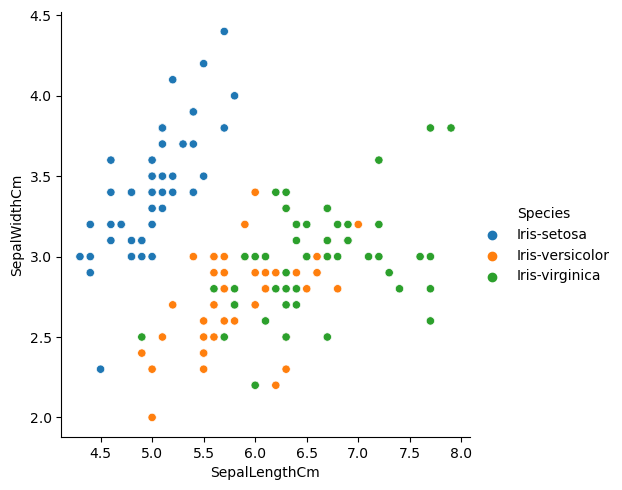

In [9]:
sns.relplot(x="SepalLengthCm", y="SepalWidthCm",data=df,hue="Species")

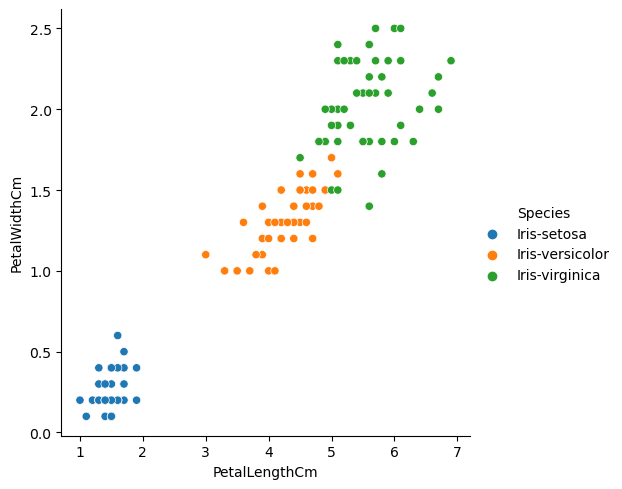

In [10]:
sns.relplot(x="PetalLengthCm", y="PetalWidthCm",data=df, hue="Species")

In [11]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<Axes: >

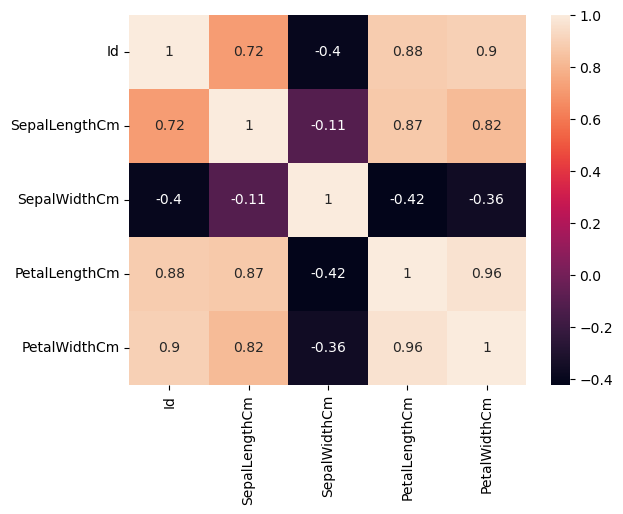

In [12]:
sns.heatmap(data=df.corr(), annot=True)

# Naive Bayes classification (Using GaussianNB model)
- Naive Bayes is a basic but effective probabilistic classification model in machine learning that draws influence from Bayes Theorem.

In [13]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### 1] Dividing the variables into 2 sets as dependent and independent:
    - dependent(df_y) as "Species" 
    - independent variables (df_x) as "SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm"

In [14]:
df_x = df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]] # independent
df_y = df[["Species"]]   #dependent 

### 2] Apply the encoding to "Species" column i.e. "df_y"


In [15]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
df_y = encode.fit_transform(df_y)

### 3] split our dataset into training(x) 70% and testing(y) 30%

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,random_state=0,test_size=0.3)

### 4] import Gaussian bayes model and train & predict

In [17]:
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

# x_test data used to predict the value of y_pred then comparing the y_pred with y_test actual value
y_pred = NB_model.predict(x_test)  
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [18]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [19]:
new_df =pd.DataFrame(y_test,columns=["Actual"])
new_df["Predicated"] = y_pred
new_df

,Actual,Predicated
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1


# Plotting Confusion Matrix

### 1] plot simple confusion matrix directly

In [20]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)
matrix

array([[16,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 11]], dtype=int64)

### 2] display diagram of confusion matrix

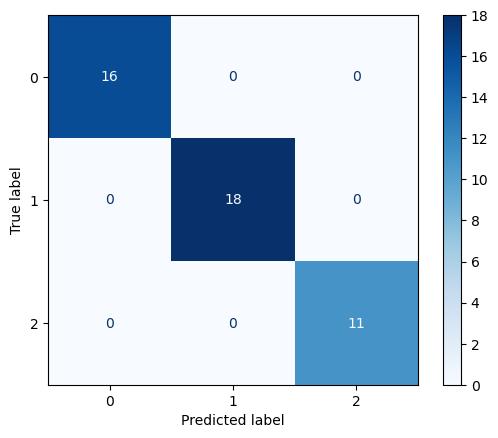

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

conf_mat = ConfusionMatrixDisplay(confusion_matrix=matrix)
conf_mat.plot(cmap=plt.cm.Blues)

### 3] Print the classfication report of matrix
### from matrix and conf_mat, get the tp,tn,fp,fn values

In [22]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred,labels=[1,0]).reshape(-1)

print("TP :",tp)
print("TN :",tn)
print("FP :",fp)
print("FN :",fn)

TP : 18
TN : 16
FP : 0
FN : 0


In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### 4] Evaluate the model accuracy

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print("mean_squared_error: ",mse)
r2 = r2_score(y_test, y_pred)
print("r2_score: ",r2)

mean_squared_error:  0.0
r2_score:  1.0


In [25]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

accuracy = accuracy_score(y_test, y_pred)  #tp+tn/tp+tn+fp+fn
print("Accuracy:",%accuracy)

recall = tp/tp+fn
print("Sensitivity/Recall:",%recall)

Precision = tp/tp+fp
print("Precision:",%Precision)

error = 1-accuracy
print("Error:",error)

Specificity = tn/(fp+tn)
print("Specificity (True negative value) :",Specificity)

SyntaxError: invalid syntax (2195511774.py, line 4)